In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [4]:
# Read the data
raw_data = pd.read_csv("train.csv")
raw_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
# Shape of the data
raw_data.shape

(69999, 172)

In [6]:
# Create a copy of original data
churn_data = raw_data.copy()

In [7]:
all_columns = raw_data.columns.tolist()

In [9]:
# feature type summary
raw_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

The data has 69999 rows and 172 columns

In [10]:
# look at data statistics
raw_data.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

### Handling Missing Values

In [11]:
# Checking for missing values
msng_values = round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)
msng_values

arpu_3g_6                   74.90
count_rech_2g_6             74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
count_rech_3g_6             74.90
fb_user_6                   74.90
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
total_rech_data_7           74.48
max_rech_data_7             74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
count_rech_3g_7             74.48
arpu_3g_7                   74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
count_rech_2g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
total_rech_data_8           73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
date_of_last_rech_data_8    73.69
fb_user_8                   73.69
count_rech_3g_

In [12]:
# Select columns with more than 40% missing values
drop_msng_col = msng_values[msng_values > 40].index.tolist()
drop_msng_col

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [13]:
# Drop columns > 40% missing
churn_data.drop(drop_msng_col, axis=1, inplace=True)
churn_data.shape

(69999, 142)

In [14]:
# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

roam_og_mou_8           5.29
og_others_8             5.29
spl_og_mou_8            5.29
loc_ic_t2t_mou_8        5.29
loc_og_t2m_mou_8        5.29
loc_og_t2c_mou_8        5.29
loc_ic_t2m_mou_8        5.29
loc_og_t2t_mou_8        5.29
loc_ic_t2f_mou_8        5.29
std_og_t2f_mou_8        5.29
loc_ic_mou_8            5.29
isd_og_mou_8            5.29
roam_ic_mou_8           5.29
std_ic_t2t_mou_8        5.29
loc_og_mou_8            5.29
offnet_mou_8            5.29
std_ic_t2m_mou_8        5.29
onnet_mou_8             5.29
std_ic_t2f_mou_8        5.29
std_og_mou_8            5.29
std_ic_t2o_mou_8        5.29
std_og_t2t_mou_8        5.29
std_ic_mou_8            5.29
spl_ic_mou_8            5.29
std_og_t2c_mou_8        5.29
isd_ic_mou_8            5.29
std_og_t2m_mou_8        5.29
ic_others_8             5.29
loc_og_t2f_mou_8        5.29
isd_og_mou_6            3.95
spl_og_mou_6            3.95
std_og_mou_6            3.95
loc_ic_t2f_mou_6        3.95
loc_ic_t2t_mou_6        3.95
loc_ic_t2m_mou

In [18]:
# Drop rows with missing values
for col in churn_data.columns:
    churn_data = churn_data[~churn_data[col].isna()]

In [19]:
# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

id                      0.0
spl_ic_mou_8            0.0
std_ic_mou_8            0.0
total_ic_mou_6          0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
isd_ic_mou_6            0.0
std_ic_mou_6            0.0
isd_ic_mou_7            0.0
isd_ic_mou_8            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
total_rech_num_6        0.0
std_ic_mou_7            0.0
std_ic_t2o_mou_8        0.0
total_rech_num_8        0.0
std_ic_t2t_mou_8        0.0
loc_ic_t2f_mou_8        0.0
loc_ic_mou_6            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2o_mou_7        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2o_mou_6        0.0
total_rech_num_7        0.0
total_rech_amt_6    

In [20]:
# The date columns don't add any value excpet for marking the last day of the period so we will drop them
date_col = [col for col in churn_data.columns if 'date' in col]
churn_data.drop(date_col, axis=1, inplace=True)
[col for col in churn_data.columns if 'date' in col]

[]

In [21]:
print(churn_data.shape)
churn_data.head(20)

(61895, 136)


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.00,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.00,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.0,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.00,352.91,0.00,0.00,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.00,0.0,0.0,0.0,28.94,84.99,0.00,0.00,0.00,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.00,0.00,0.00,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.00,0.00,0.00,0.00,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.

In [22]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in churn_data.columns:
    if churn_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [23]:
# Drop single value columns
churn_data.drop(drop_col_sngl_val, axis=1, inplace=True)
churn_data.shape

(61895, 126)

In [26]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
raw_data.loc[raw_data.total_rech_data_6.isnull() & raw_data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

[ ]


In [30]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
       ]

In [31]:
# impute missing values with 0
raw_data[zero_impute] = raw_data[zero_impute].apply(lambda x: x.fillna(0))

In [32]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(raw_data[zero_impute].isnull().sum()*100/raw_data.shape[1])

# summary
print("\n\nSummary statistics\n")
print(raw_data[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.0000

In [36]:
# drop id and date columns
print("Shape before dropping: ", raw_data.shape)
print("Shape after dropping: ", raw_data.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 172)


### Creating New Features

In [38]:
# Create a total mou instead of offnet and onnet

churn_data['total_mou_6'] = churn_data['onnet_mou_6'] + churn_data['offnet_mou_6']
churn_data['total_mou_7'] = churn_data['onnet_mou_7'] + churn_data['offnet_mou_7']
churn_data['total_mou_8'] = churn_data['onnet_mou_8'] + churn_data['offnet_mou_8']

# Drop the redundant columns
churn_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

churn_data.head()

,id,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_6,total_mou_7,total_mou_8
0,0,31.277,87.009,7.527,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,80.82,221.06,3.62
1,1,0.000,122.787,42.953,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0.00,25.99,30.89
2,2,60.806,103.176,0.000,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,54.52,97.98,0.00
3,3,156.362,205.260,111.095,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,50,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,982,0.0,0.0,0.0,0,76.02,94.49,50.23
4,4,240.708,128.191,1

In [39]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in churn_data.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    churn_data[f'gd_ph_{col}'] = ( churn_data[f'{col}_6'] + churn_data[f'{col}_7'] ) / 2
    churn_data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
churn_data.head()

,id,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_8,gd_ph_loc_ic_t2m_mou,gd_ph_total_mou,gd_ph_isd_ic_mou,gd_ph_loc_og_t2m_mou,gd_ph_spl_og_mou,gd_ph_roam_ic_mou,gd_ph_spl_ic_mou,gd_ph_loc_ic_t2f_mou,gd_ph_max_rech_amt,gd_ph_std_og_mou,gd_ph_std_og_t2f_mou,gd_ph_loc_og_t2f_mou,gd_ph_monthly_2g,gd_ph_isd_og_mou,gd_ph_std_ic_t2m_mou,gd_ph_loc_ic_mou,gd_ph_total_rech_amt,gd_ph_loc_og_t2c_mou,gd_ph_vol_2g_mb,gd_ph_loc_og_mou,gd_ph_loc_ic_t2t_mou,gd_ph_total_og_mou,gd_ph_ic_others,gd_ph_total_rech_num,gd_ph_og_others,gd_ph_arpu,gd_ph_monthly_3g,gd_ph_std_og_t2t_mou,gd_ph_std_ic_mou,gd_ph_loc_og_t2t_mou,gd_ph_std_ic_t2f_mou,gd_ph_sachet_2g,gd_ph_std_og_t2m_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_ic_mou,gd_ph_last_day_rch_amt,gd_ph_vol_3g_mb,gd_ph_roam_og_mou,gd_ph_sachet_3g
0,0,7.527,0.0,0.00,0.28,2.33,0.00,0.00,2.61,1.01,0.0,0.0,1.01,0.0,0.00,0.0,3.63,7.79,16.91,0.00,24.71,0.21,14.96,0.0,15.18,40.56,0.66,0.0,0.00,2,10,10,0,0.00,0.0,0,0,0,0,1958,0.0,0.0,0.0,0,3.62,10.955,150.940,0.0,10.665,4.415,0.00,0.0,0.000,65.0,135.040,0.00,0.00,0.0,0.0,13.710,14.01,71.0,0.000,0.000,11.785,3.055,151.445,0.9,2.5,0.19,59.1430,0.0,85.36,17.520,1.115,0.0,0.0,49.680,3.805,32.440,65.0,0.00,0.000,0.0
1,1,42.953,0.0,0.00,0.00,0.00,0.00,29.79,0.00,0.00,0.0,0.0,0.00,0.0,31.66,0.0,31.66,10.53,11.09,3.40,25.03,0.00,0.00,0.0,0.00,25.04,0.01,0.0,0.00,5,50,50,0,0.00,0.0,0,0,0,0,710,0.0,0.0,0.0,0,30.89,10.045,12.995,0.0,0.000,15.365,0.00,0.0,1.005,72.5,0.000,0.00,0.00,0.0,0.0,0.000,21.44,72.5,11.005,176.455,0.000,10.385,15.365,0.0,3.5,0.00,61.3935,0.5,0.00,0.000,0.000,0.0,0.0,0.000,0.000,21.440,0.0,1.98,0.000,0.0
2,2,0.000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,6.49,23.51,0.00,30.01,0.00,6.38,0.0,6.38,36.64,0.00,0.0,0.25,2,0,0,0,0.00,0.0,0,0,0,0,882,0.0,0.0,0.0,0,0.00,57.520,76.250,0.0,12.055,2.135,0.00,0.0,0.000,70.0,56.965,0.00,0.00,0.0,0.0,10.345,62.86,95.0,1.070,0.000,18.810,5.335,77.925,0.0,3.0,0.00,81.9910,0.0,1.47,16.195,6.755,0.0,0.0,55.495,5.845,79.060,60.0,0.00,0.000,0.0
3,3,111.095,0.0,1.63,0.00,23.63,0.00,8.03,23.63,0.00,4.6,0.0,4.60,0.0,25.61,0.0,53.84,23.88,57.14,0.00,81.03,0.00,2.81,0.0,2.81,83.84,0.00,0.0,0.00,3,130,50,50,0.00,0.0,0,0,0,0,982,0.0,0.0,0.0,0,50.23,49.110,85.255,0.0,41.400,12.040,0.00,0.0,4.020,110.0,27.075,0.28,0.00,0.0,0.0,4.585,68.05,200.0,0.000,0.000,46.875,14.910,86.005,0.0,3.0,0.00,180.8110,0.0,6.16,4.585,5.465,0.0,0.0,20.630,0.000,72.645,110.0,0.00,0.000,0.0
4,4,101.565,0.0,0.00,6.13,4.61,5.01,0.00,15.76,0.00,0.0,0.0,0.00,0.0,0.00,0.0,15.76,2.66,19.49,6.14,28.31,0.00,0.00,0.0,0.00,28.31,0.00,0.0,0.00,8,122,30,30,213.47,0.0,0,6,0,0,647,0.0,0.0,0.0,0,15.76,7.455,60.605,0.0,28.310,8.500,26.82,0.0,4.570,45.5,2.175,0.00,6.61,0.0,0.0,0.000,15.45,213.0,4.925,349.845,42.425,3.415,53.100,0.0,11.5,0.00,184.4495,0.0,0.00,0.000,7.495,0.0,6.5,2.175,0.000,15.450,17.5,0.00,7.865,0.5


In [41]:

churn_data.shape

(61895, 85)

In [42]:
# Reset the index 
churn_data.reset_index(inplace=True, drop=True)
churn_data.head()

,id,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_8,gd_ph_loc_ic_t2m_mou,gd_ph_total_mou,gd_ph_isd_ic_mou,gd_ph_loc_og_t2m_mou,gd_ph_spl_og_mou,gd_ph_roam_ic_mou,gd_ph_spl_ic_mou,gd_ph_loc_ic_t2f_mou,gd_ph_max_rech_amt,gd_ph_std_og_mou,gd_ph_std_og_t2f_mou,gd_ph_loc_og_t2f_mou,gd_ph_monthly_2g,gd_ph_isd_og_mou,gd_ph_std_ic_t2m_mou,gd_ph_loc_ic_mou,gd_ph_total_rech_amt,gd_ph_loc_og_t2c_mou,gd_ph_vol_2g_mb,gd_ph_loc_og_mou,gd_ph_loc_ic_t2t_mou,gd_ph_total_og_mou,gd_ph_ic_others,gd_ph_total_rech_num,gd_ph_og_others,gd_ph_arpu,gd_ph_monthly_3g,gd_ph_std_og_t2t_mou,gd_ph_std_ic_mou,gd_ph_loc_og_t2t_mou,gd_ph_std_ic_t2f_mou,gd_ph_sachet_2g,gd_ph_std_og_t2m_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_ic_mou,gd_ph_last_day_rch_amt,gd_ph_vol_3g_mb,gd_ph_roam_og_mou,gd_ph_sachet_3g,gd_ph_vbc_3g
0,0,7.527,0.0,0.00,0.28,2.33,0.00,0.00,2.61,1.01,0.0,0.0,1.01,0.0,0.00,0.0,3.63,7.79,16.91,0.00,24.71,0.21,14.96,0.0,15.18,40.56,0.66,0.0,0.00,2,10,10,0,0.00,0.0,0,0,0,0,1958,0.0,0.0,0.0,0,3.62,10.955,150.940,0.0,10.665,4.415,0.00,0.0,0.000,65.0,135.040,0.00,0.00,0.0,0.0,13.710,14.01,71.0,0.000,0.000,11.785,3.055,151.445,0.9,2.5,0.19,59.1430,0.0,85.36,17.520,1.115,0.0,0.0,49.680,3.805,32.440,65.0,0.00,0.000,0.0,0.0
1,1,42.953,0.0,0.00,0.00,0.00,0.00,29.79,0.00,0.00,0.0,0.0,0.00,0.0,31.66,0.0,31.66,10.53,11.09,3.40,25.03,0.00,0.00,0.0,0.00,25.04,0.01,0.0,0.00,5,50,50,0,0.00,0.0,0,0,0,0,710,0.0,0.0,0.0,0,30.89,10.045,12.995,0.0,0.000,15.365,0.00,0.0,1.005,72.5,0.000,0.00,0.00,0.0,0.0,0.000,21.44,72.5,11.005,176.455,0.000,10.385,15.365,0.0,3.5,0.00,61.3935,0.5,0.00,0.000,0.000,0.0,0.0,0.000,0.000,21.440,0.0,1.98,0.000,0.0,0.0
2,2,0.000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,6.49,23.51,0.00,30.01,0.00,6.38,0.0,6.38,36.64,0.00,0.0,0.25,2,0,0,0,0.00,0.0,0,0,0,0,882,0.0,0.0,0.0,0,0.00,57.520,76.250,0.0,12.055,2.135,0.00,0.0,0.000,70.0,56.965,0.00,0.00,0.0,0.0,10.345,62.86,95.0,1.070,0.000,18.810,5.335,77.925,0.0,3.0,0.00,81.9910,0.0,1.47,16.195,6.755,0.0,0.0,55.495,5.845,79.060,60.0,0.00,0.000,0.0,0.0
3,3,111.095,0.0,1.63,0.00,23.63,0.00,8.03,23.63,0.00,4.6,0.0,4.60,0.0,25.61,0.0,53.84,23.88,57.14,0.00,81.03,0.00,2.81,0.0,2.81,83.84,0.00,0.0,0.00,3,130,50,50,0.00,0.0,0,0,0,0,982,0.0,0.0,0.0,0,50.23,49.110,85.255,0.0,41.400,12.040,0.00,0.0,4.020,110.0,27.075,0.28,0.00,0.0,0.0,4.585,68.05,200.0,0.000,0.000,46.875,14.910,86.005,0.0,3.0,0.00,180.8110,0.0,6.16,4.585,5.465,0.0,0.0,20.630,0.000,72.645,110.0,0.00,0.000,0.0,0.0
4,4,101.565,0.0,0.00,6.13,4.61,5.01,0.00,15.76,0.00,0.0,0.0,0.00,0.0,0.00,0.0,15.76,2.66,19.49,6.14,28.31,0.00,0.00,0.0,0.00,28.31,0.00,0.0,0.00,8,122,30,30,213.47,0.0,0,6,0,0,647,0.0,0.0,0.0,0,15.76,7.455,60.605,0.0,28.310,8.500,26.82,0.0,4.570,45.5,2.175,0.00,6.61,0.0,0.0,0.000,15.45,213.0,4.925,349.845,42.425,3.415,53.100,0.0,11.5,0.00,184.4495,0.0,0.00,0.000,7.495,0.0,6.5,2.175,0.000,15.450,17.5,0.00,7.865,0.5,0.0


In [43]:
churn_data.describe()

,id,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_8,gd_ph_loc_ic_t2m_mou,gd_ph_total_mou,gd_ph_isd_ic_mou,gd_ph_loc_og_t2m_mou,gd_ph_spl_og_mou,gd_ph_roam_ic_mou,gd_ph_spl_ic_mou,gd_ph_loc_ic_t2f_mou,gd_ph_max_rech_amt,gd_ph_std_og_mou,gd_ph_std_og_t2f_mou,gd_ph_loc_og_t2f_mou,gd_ph_monthly_2g,gd_ph_isd_og_mou,gd_ph_std_ic_t2m_mou,gd_ph_loc_ic_mou,gd_ph_total_rech_amt,gd_ph_loc_og_t2c_mou,gd_ph_vol_2g_mb,gd_ph_loc_og_mou,gd_ph_loc_ic_t2t_mou,gd_ph_total_og_mou,gd_ph_ic_others,gd_ph_total_rech_num,gd_ph_og_others,gd_ph_arpu,gd_ph_monthly_3g,gd_ph_std_og_t2t_mou,gd_ph_std_ic_mou,gd_ph_loc_og_t2t_mou,gd_ph_std_ic_t2f_mou,gd_ph_sachet_2g,gd_ph_std_og_t2m_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_ic_mou,gd_ph_last_day_rch_amt,gd_ph_vol_3g_mb,gd_ph_roam_og_mou,gd_ph_sachet_3g,gd_ph_vbc_3g
count,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.00000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000
mean,35034.549350,297.141384,7.146508,9.913633,47.397539,94.314578,3.743625,1.41912,145.463164,83.714672,89.951245,1.062159,174.730701,0.823694,5.087951,0.032233,326.144530,48.668652,112.128228,12.157094,172.963034,9.921441,21.460639,2.121145,33.505854,215.889248,0.039702,8.382982,0.990874,7.673754,346.968204,113.656677,66.091057,53.608808,140.443758,0.087002,0.489103,0.083432,0.091074,1259.532175,73.023376,69.811301,62.324564,0.058389,334.283881,110.687011,338.628132,7.809067,95.122576,4.532295,8.435650,0.048942,12.777042,106.880208,175.232460,1.109206,3.849570,0.086130,0.795970,21.551495,172.848195,342.567687,1.257411,54.413221,147.306102,49.375136,328.113387,0.965916,8.027224,0.239494,294.847125,0.076185,83.281118,33.582088,48.326461,2.239596,0.441894,90.839402,9.788381,215.261168,62.803385,126.777933,12.004756,0.081654,66.067933
std,20192.992366,357.781341,54.289761,65.795591,157.589880,154.581969,13.177820,6.61620,249.156529,268.057765,268.576910,7.746238,410.319815,30.311775,18.033598,2.195000,485.988744,136.659162,169.568348,39.408502,249.866791,52.464754,83.249398,16.243365,109.134459,293.477403,0.148848,63.985587,12.026228,7.244114,433.235585,121.505914,100.288084,219.814823,562.907977,0.309595,1.694806,0.387904,0.708711,960.863754,276.949206,276.261728,262.034779,0.234480,491.461693,159.873448,457.076650,59.858961,151.837284,17.217826,48.375615,0.129531,40.189586,101.367006,378.056172,7.568923,12.893495,0.270576,29.904387,77.422714,242.324616,385.476672,5.768082,198.117914,241.949178,134.759

We can see almost every columns has some outliers, while most of them are becuase there are 0.0 as the service was not used some are actual outliers
Since we don't have actuall bussines people to check the factfulness of the data, we will cap those features

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

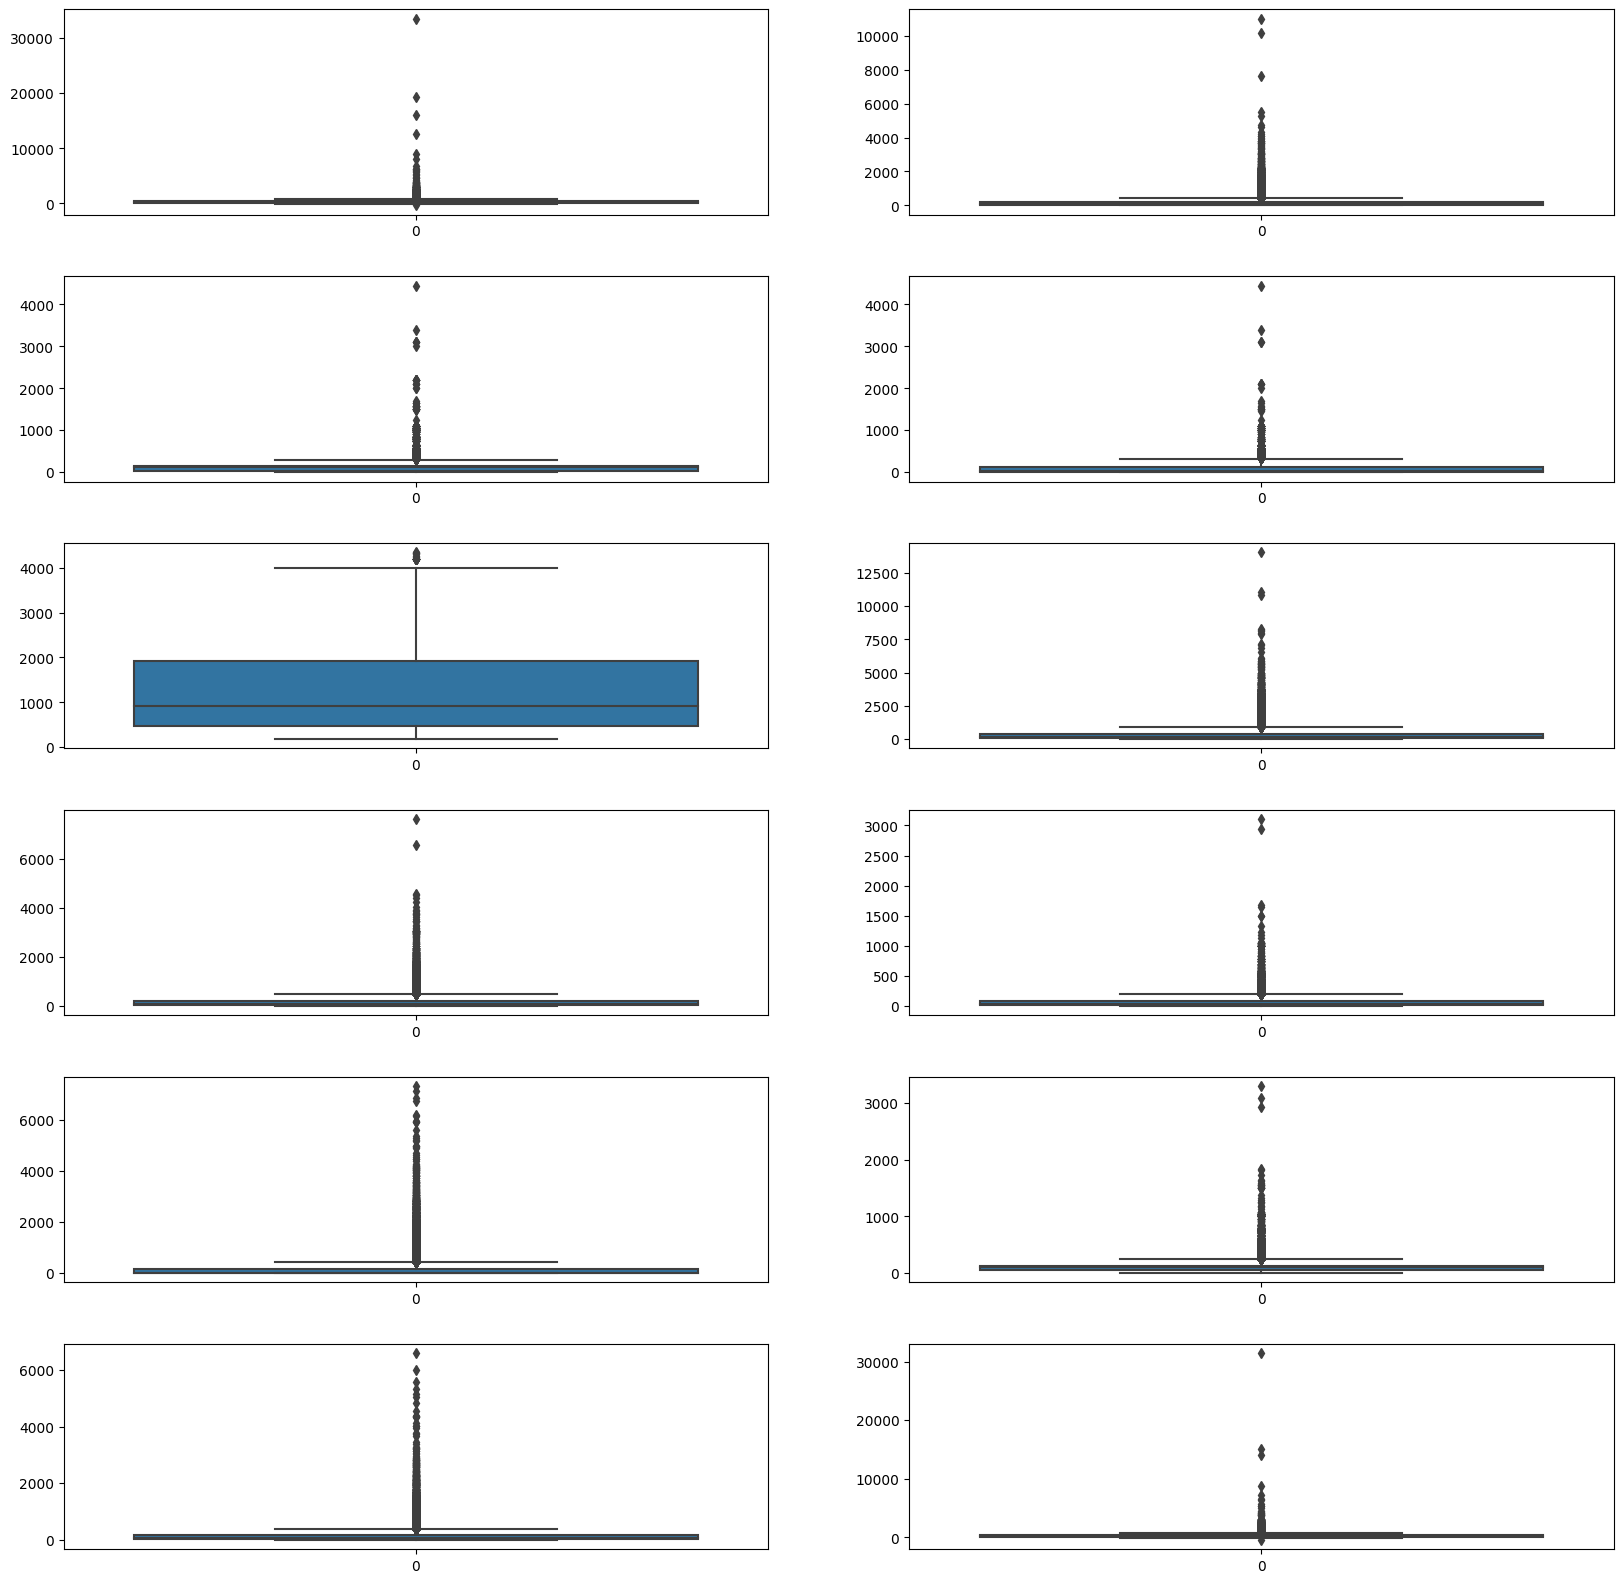

In [44]:
# Going through the output of describe we can filter out the features that needs a second look

# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
# sns.boxplot(x=churn_data['arpu_8'], ax=axes[0])
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(churn_data[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

## filter high-value customers

## calculate total data recharge amount

In [52]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
raw_data['total_data_rech_6'] = raw_data.total_rech_data_6 * raw_data.av_rech_amt_data_6
raw_data['total_data_rech_7'] = raw_data.total_rech_data_7 * raw_data.av_rech_amt_data_7

## add total data recharge and total recharge to get total combined recharge amount for a month


In [53]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
raw_data['amt_data_6'] = raw_data.total_rech_amt_6 + raw_data.total_data_rech_6
raw_data['amt_data_7'] = raw_data.total_rech_amt_7 + raw_data.total_data_rech_7

In [54]:
# calculate average recharge done by customer in June and July
raw_data['av_amt_data_6_7'] = (raw_data.amt_data_6 + raw_data.amt_data_7)/2

In [56]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(raw_data.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [58]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
raw_data_filtered = raw_data.loc[raw_data.av_amt_data_6_7 >= raw_data.av_amt_data_6_7.quantile(0.7), :]
raw_data_filtered = raw_data_filtered.reset_index(drop=True)
raw_data_filtered.shape

(21013, 177)

In [59]:
# delete variables created to filter high-value customers
raw_data_filtered = raw_data_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
raw_data_filtered.shape

(21013, 172)

We're left with 21013 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

### Derive Churn

In [61]:
# calculate total incoming and outgoing minutes of usage
raw_data_filtered['total_calls_mou_8'] = raw_data_filtered.total_ic_mou_8 + raw_data_filtered.total_og_mou_8

In [63]:
# calculate 2g and 3g data consumption
raw_data_filtered['total_internet_mb_8'] =  raw_data_filtered.vol_2g_mb_8 + raw_data_filtered.vol_3g_mb_8

In [64]:
# create churn variable: those who have not used either calls or internet in the month of August are customers who have churned

# 0 - not churn, 1 - churn
raw_data_filtered['raw_data'] = raw_data_filtered.apply(lambda row: 1 if (row.total_calls_mou_8 == 0 and row.total_internet_mb_8 == 0) else 0, axis=1)

In [65]:
# delete derived variables
raw_data_filtered = raw_data_filtered.drop(['total_calls_mou_8', 'total_internet_mb_8'], axis=1)

In [66]:
# change data type to category
raw_data_filtered.raw_data = raw_data_filtered.raw_data.astype("category")

# print churn ratio
print("Churn Ratio:")
print(raw_data_filtered.raw_data.value_counts()*100/raw_data_filtered.shape[0])

Churn Ratio:
0    94.669966
1     5.330034
Name: raw_data, dtype: float64


### Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [68]:
raw_data_filtered['arpu_diff'] = raw_data_filtered.arpu_8 - ((raw_data_filtered.arpu_6 + raw_data_filtered.arpu_7)/2)

raw_data_filtered['onnet_mou_diff'] = raw_data_filtered.onnet_mou_8 - ((raw_data_filtered.onnet_mou_6 + raw_data_filtered.onnet_mou_7)/2)

raw_data_filtered['offnet_mou_diff'] = raw_data_filtered.offnet_mou_8 - ((raw_data_filtered.offnet_mou_6 + raw_data_filtered.offnet_mou_7)/2)

raw_data_filtered['roam_ic_mou_diff'] = raw_data_filtered.roam_ic_mou_8 - ((raw_data_filtered.roam_ic_mou_6 + raw_data_filtered.roam_ic_mou_7)/2)

raw_data_filtered['roam_og_mou_diff'] = raw_data_filtered.roam_og_mou_8 - ((raw_data_filtered.roam_og_mou_6 + raw_data_filtered.roam_og_mou_7)/2)

raw_data_filtered['loc_og_mou_diff'] = raw_data_filtered.loc_og_mou_8 - ((raw_data_filtered.loc_og_mou_6 + raw_data_filtered.loc_og_mou_7)/2)

raw_data_filtered['std_og_mou_diff'] = raw_data_filtered.std_og_mou_8 - ((raw_data_filtered.std_og_mou_6 + raw_data_filtered.std_og_mou_7)/2)

raw_data_filtered['isd_og_mou_diff'] = raw_data_filtered.isd_og_mou_8 - ((raw_data_filtered.isd_og_mou_6 + raw_data_filtered.isd_og_mou_7)/2)

raw_data_filtered['spl_og_mou_diff'] = raw_data_filtered.spl_og_mou_8 - ((raw_data_filtered.spl_og_mou_6 + raw_data_filtered.spl_og_mou_7)/2)

raw_data_filtered['total_og_mou_diff'] = raw_data_filtered.total_og_mou_8 - ((raw_data_filtered.total_og_mou_6 + raw_data_filtered.total_og_mou_7)/2)

raw_data_filtered['loc_ic_mou_diff'] = raw_data_filtered.loc_ic_mou_8 - ((raw_data_filtered.loc_ic_mou_6 + raw_data_filtered.loc_ic_mou_7)/2)

raw_data_filtered['std_ic_mou_diff'] = raw_data_filtered.std_ic_mou_8 - ((raw_data_filtered.std_ic_mou_6 + raw_data_filtered.std_ic_mou_7)/2)

raw_data_filtered['isd_ic_mou_diff'] = raw_data_filtered.isd_ic_mou_8 - ((raw_data_filtered.isd_ic_mou_6 + raw_data_filtered.isd_ic_mou_7)/2)

raw_data_filtered['spl_ic_mou_diff'] = raw_data_filtered.spl_ic_mou_8 - ((raw_data_filtered.spl_ic_mou_6 + raw_data_filtered.spl_ic_mou_7)/2)

raw_data_filtered['total_ic_mou_diff'] = raw_data_filtered.total_ic_mou_8 - ((raw_data_filtered.total_ic_mou_6 + raw_data_filtered.total_ic_mou_7)/2)

raw_data_filtered['total_rech_num_diff'] = raw_data_filtered.total_rech_num_8 - ((raw_data_filtered.total_rech_num_6 + raw_data_filtered.total_rech_num_7)/2)

raw_data_filtered['total_rech_amt_diff'] = raw_data_filtered.total_rech_amt_8 - ((raw_data_filtered.total_rech_amt_6 + raw_data_filtered.total_rech_amt_7)/2)

raw_data_filtered['max_rech_amt_diff'] = raw_data_filtered.max_rech_amt_8 - ((raw_data_filtered.max_rech_amt_6 + raw_data_filtered.max_rech_amt_7)/2)

raw_data_filtered['total_rech_data_diff'] = raw_data_filtered.total_rech_data_8 - ((raw_data_filtered.total_rech_data_6 + raw_data_filtered.total_rech_data_7)/2)

raw_data_filtered['max_rech_data_diff'] = raw_data_filtered.max_rech_data_8 - ((raw_data_filtered.max_rech_data_6 + raw_data_filtered.max_rech_data_7)/2)

raw_data_filtered['av_rech_amt_data_diff'] = raw_data_filtered.av_rech_amt_data_8 - ((raw_data_filtered.av_rech_amt_data_6 + raw_data_filtered.av_rech_amt_data_7)/2)

raw_data_filtered['vol_2g_mb_diff'] = raw_data_filtered.vol_2g_mb_8 - ((raw_data_filtered.vol_2g_mb_6 + raw_data_filtered.vol_2g_mb_7)/2)

raw_data_filtered['vol_3g_mb_diff'] = raw_data_filtered.vol_3g_mb_8 - ((raw_data_filtered.vol_3g_mb_6 + raw_data_filtered.vol_3g_mb_7)/2)

In [69]:
# let's look at summary of one of the difference variables
raw_data_filtered['total_og_mou_diff'].describe()

count    21013.000000
mean       -68.437759
std        502.233995
min      -7213.410000
25%       -169.295000
50%        -13.985000
75%         68.485000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

### Univariate EDA

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


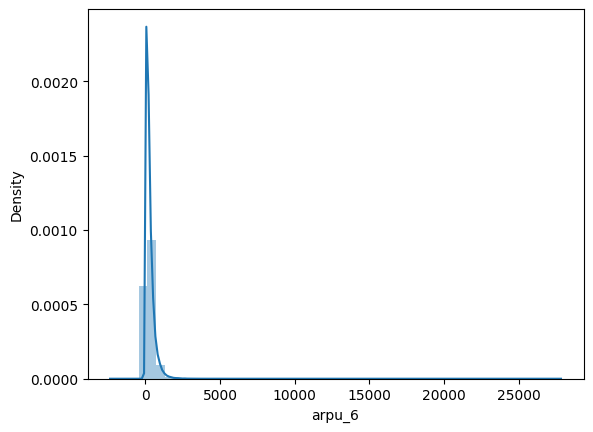

In [73]:
univariate(raw_data.arpu_6)

count    69297.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


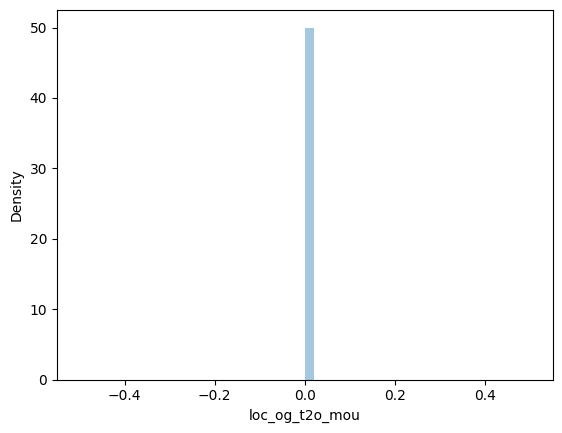

In [74]:
univariate(raw_data.loc_og_t2o_mou)

count    69297.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


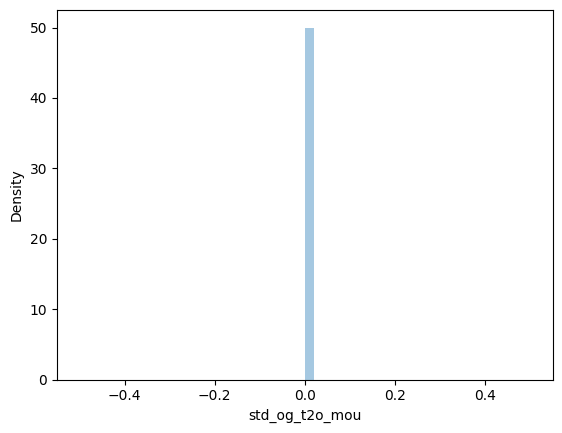

In [75]:
univariate(raw_data.std_og_t2o_mou)

count    66296.000000
mean       132.978257
std        311.896596
min          0.000000
25%          6.410000
50%         32.100000
75%        115.060000
max      10752.560000
Name: onnet_mou_8, dtype: float64


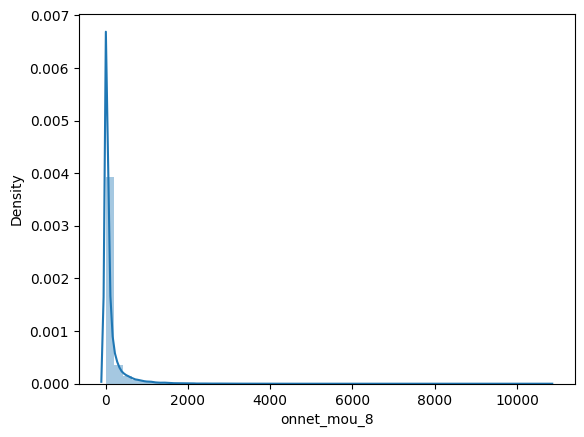

In [76]:
univariate(raw_data.onnet_mou_8)

Variables are very skewed towards the left.

### Cap outliers in all numeric variables with k-sigma technique

In [84]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [85]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


## Modelling

In [90]:
 #import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import statsmodels.api as sm

In [93]:
# change raw_data to numeric
raw_data_filtered['raw_data'] = pd.to_numeric(raw_data_filtered['raw_data'])

## Train Test split

In [94]:
# divide data into train and test
X = raw_data_filtered.drop("raw_data", axis = 1)
y = raw_data_filtered.raw_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [95]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(15759, 195)

(15759,)

(5254, 195)

(5254,)

### Aggregating the categorical columns

In [96]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').raw_data.mean()
train.groupby('night_pck_user_7').raw_data.mean()
train.groupby('night_pck_user_8').raw_data.mean()
train.groupby('fb_user_6').raw_data.mean()
train.groupby('fb_user_7').raw_data.mean()
train.groupby('fb_user_8').raw_data.mean()

night_pck_user_6
0.0    0.041343
1.0    0.067633
Name: raw_data, dtype: float64

night_pck_user_7
0.0    0.028348
1.0    0.019512
Name: raw_data, dtype: float64

night_pck_user_8
0.0    0.002696
1.0    0.000000
Name: raw_data, dtype: float64

fb_user_6
0.0    0.061824
1.0    0.040373
Name: raw_data, dtype: float64

fb_user_7
0.0    0.063516
1.0    0.025225
Name: raw_data, dtype: float64

fb_user_8
0.0    0.0252
1.0    0.0000
Name: raw_data, dtype: float64

In [97]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [ ]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))


### PCA and Logistic Regression

In [106]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [ ]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)


In [ ]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


### RFE for Feature Selection